# Testing signal filters

In [1]:
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

## Create input data

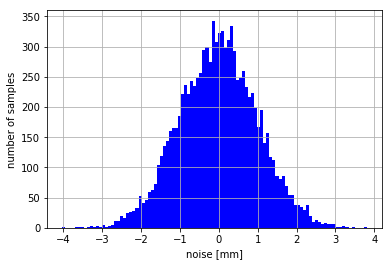

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

dt = 0.001
t = np.arange(0, 10, dt)
sinus = 50 * np.sin(2*np.pi*2*t)

mu, sigma = 0, 0.2 # mean and standard deviation
noise_amp = 5.0
noise = noise_amp * np.random.normal(mean, sigma, t.size)
count, bins, ignored = plt.hist(noise, 100, facecolor='b')
plt.ylabel('number of samples')
plt.xlabel('noise [mm]')
plt.grid()
plt.show()

x = sinus + noise


p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

## Filter signals

### Smooth

In [150]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

x_smoothed = smooth(x, 15)
#x_smoothed = smooth(x_smoothed, 5)

p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.line(t, x_smoothed, color="red", legend="smoothed", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

### Savitzky-Golay

In [151]:
from scipy import signal

x_savgol = signal.savgol_filter(x, 9, 3, mode='interp')

p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.line(t, x_savgol, color="red", legend="Savitzky-Golay", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

### Butter

In [152]:
def butter_lowpass(sampling_freq, order, freq_low):
    nyq = 0.5 * sampling_freq
    lo_cutoff = freq_low / nyq
    b, a = signal.butter(order, lo_cutoff, btype='lowpass', analog=False)
    return b, a

def plot_freq_response(sampling_freq, b, a):
    # Plot the frequency response.
    w, h = signal.freqz(b, a, worN=8000)
    p2 = figure(plot_width=400, plot_height=400, x_range = (0, 60), y_range = (-10, 1),
               title = 'Butterworth frequency response')

    p2.line(sampling_freq * w/(2*np.pi), 20 * np.log10(abs(h)), color="blue")

    p2.xaxis[0].axis_label = 'Frequency [Hz]'
    p2.yaxis[0].axis_label = 'Gain [dB]'
    show(p2)
    
order = 3
sampling_freq = int(1/dt)
freq_low = 50 #[Hz]
b, a = butter_lowpass(sampling_freq, order, freq_low)
#plot_freq_response(sampling_freq, b, a)

x_butter = signal.filtfilt(b, a, x)

p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.line(t, x_butter, color="red", legend="Butterworth", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

### Wiener

In [153]:
x_wiener = signal.wiener(x, 15)

p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.line(t, x_wiener, color="red", legend="Wiener", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

### comparison of filters

In [154]:
from bokeh.palettes import Category10

colors = Category10

p = figure(plot_width=900, plot_height=300)

p.line(t, x, color="blue", legend="sinus + noise")
p.circle(t, x, color="blue", legend="sinus + noise")

p.line(t, sinus, color="black", legend="sinus", line_width=2.0)

p.line(t, x_smoothed, color=colors[5][0], legend="smoothed", line_width=2.0)
p.line(t, x_savgol, color=colors[5][1], legend="Savitzky-Golay", line_width=2.0)
p.line(t, x_butter, color=colors[5][2], legend="Butterworth", line_width=2.0)
p.line(t, x_wiener, color=colors[5][3], legend="Wiener", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'displacement [mm]'

show(p)

## derivative

In [159]:
sinus_diff = np.diff(sinus)/dt
x_diff = np.diff(x)/dt

sinus_grad = np.gradient(sinus, dt)
x_grad = np.gradient(x, dt)

p = figure(plot_width=900, plot_height=300)

p.line(t[:-1], x_diff, color="blue", legend="sinus + noise diff")
p.circle(t[:-1], x_diff, color="blue", legend="sinus + noise diff")

p.line(t, x_grad, color="red", legend="sinus + noise grad")
p.circle(t, x_grad, color="red", legend="sinus + noise grad")

p.line(t[:-1], sinus_diff, color="black", legend="sinus diff", line_width=2.0)

p.line(t, sinus_grad, color="brown", legend="sinus grad", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'velocity [mm/s]'

show(p)

### smooth

In [161]:
x_smoothed_diff = np.diff(x_smoothed)/dt
x_smoothed_grad = np.gradient(x_smoothed, dt)

p = figure(plot_width=900, plot_height=300)

#p.line(t[:-1], x_diff, color="blue", legend="sinus + noise diff")
#p.circle(t[:-1], x_diff, color="blue", legend="sinus + noise diff")

p.line(t[:-1], sinus_diff, color="black", legend="sinus diff", line_width=2.0)

p.line(t[:-1], x_smoothed_diff, color="red", legend="smothed diff", line_width=2.0)

p.line(t, x_smoothed_grad, color="orange", legend="smothed grad", line_width=2.0)

p.xaxis[0].axis_label = 'time [s]'
p.yaxis[0].axis_label = 'velocity [mm/s]'

show(p)